In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [3]:
# Loading the Data
names = ['x', 'y', 'class']
df = pd.read_csv('./demo_data/3.concertriccir2.csv', header=None, names=names)
print(df.head())

# Data specifyin in to Matrix X and Y detailed
X = np.array(df.iloc[:, 0:2])
y = np.array(df['class'])

          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


# Simple Cross Validation

In [4]:
# Spliting the data into Train data and Test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train, X_test: ",X_train.shape, X_test.shape)
print("y_train, y_test: ",y_train.shape, y_test.shape)

print("\n")

#Spliting the Exisiting Training data in to Train and Simple Corss Validation data segments.
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.3)
print("X_tr, X_cv: ", X_tr.shape, X_cv.shape)
print("y_tr, y_cv: ", y_tr.shape, y_cv.shape)

X_train, X_test:  (350, 2) (150, 2)
y_train, y_test:  (350,) (150,)


X_tr, X_cv:  (245, 2) (105, 2)
y_tr, y_cv:  (245,) (105,)


In [16]:
for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)
    acc = accuracy_score(y_cv, pred, normalize=True)*float(100)
    print('\n CV Accuracy for k = %d is %d%%'  % (i, acc))


 CV Accuracy for k = 1 is 91%

 CV Accuracy for k = 3 is 92%

 CV Accuracy for k = 5 is 88%

 CV Accuracy for k = 7 is 89%

 CV Accuracy for k = 9 is 89%

 CV Accuracy for k = 11 is 87%

 CV Accuracy for k = 13 is 87%

 CV Accuracy for k = 15 is 87%

 CV Accuracy for k = 17 is 87%

 CV Accuracy for k = 19 is 84%

 CV Accuracy for k = 21 is 81%

 CV Accuracy for k = 23 is 83%

 CV Accuracy for k = 25 is 80%

 CV Accuracy for k = 27 is 78%

 CV Accuracy for k = 29 is 76%

 CV Accuracy for k = 31 is 72%

 CV Accuracy for k = 33 is 72%

 CV Accuracy for k = 35 is 70%

 CV Accuracy for k = 37 is 68%

 CV Accuracy for k = 39 is 69%

 CV Accuracy for k = 41 is 69%

 CV Accuracy for k = 43 is 67%

 CV Accuracy for k = 45 is 65%

 CV Accuracy for k = 47 is 63%

 CV Accuracy for k = 49 is 62%


In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_tr, y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


****Test accuracy for k = 1 is 90%


# K[10]-Fold Cross Validation

In [25]:
myList = list(range(1,50))
neighbours = list(filter(lambda x: x%2 != 0,myList))

cv_scores = []

for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_tr, y_tr, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
print(cv_scores)

[0.8810652173913043, 0.8810797101449275, 0.852731884057971, 0.8570797101449275, 0.8203985507246377, 0.8408985507246378, 0.8375942028985508, 0.8088985507246378, 0.796731884057971, 0.776731884057971, 0.7723840579710145, 0.7476884057971015, 0.7231739130434783, 0.7068260869565217, 0.6863115942028986, 0.669963768115942, 0.6452681159420289, 0.632572463768116, 0.6202246376811595, 0.5951811594202899, 0.5913623188405798, 0.5746666666666667, 0.5581521739130435, 0.5581521739130435, 0.5541521739130435]


In [29]:
#Changing to MissClassification Errors
MSE = [1-x for x in cv_scores]

#Determining the Best K
optimal_k = neighbours[MSE.index(min(MSE))]
print('The Optimal Number of Neighbours is %d' % optimal_k)

The Optimal Number of Neighbours is 3


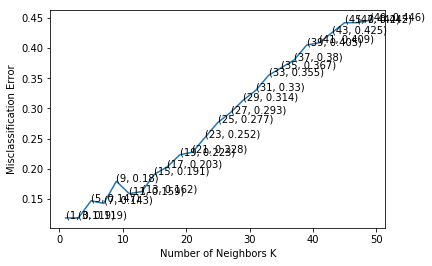

the misclassification error for each k value is :  [0.119 0.119 0.147 0.143 0.18  0.159 0.162 0.191 0.203 0.223 0.228 0.252
 0.277 0.293 0.314 0.33  0.355 0.367 0.38  0.405 0.409 0.425 0.442 0.442
 0.446]


In [32]:
#Plot MisscalssificationError vs K
plt.plot(neighbours, MSE)
for xy in zip(neighbours, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [37]:
knn_optimal = KNeighborsClassifier(n_neighbors=3)

#fitting the model
knn_optimal.fit(X_tr, y_tr)

#predict the Response 
pred = knn_optimal.predict(X_test)

#Evaluate Accuracy
acc = accuracy_score(y_test, pred)*float(100)
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 3 is 88.000000%
